# Generalization with OOP: The SMABacktester Class

## Using the SMABacktester Class

In [28]:
import pandas as pd
import numpy as np
###########################################
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
import seaborn as sns
sns.set()
###########################################
import datetime as dt
import yfinance as yf
###########################################
from scipy.optimize import brute

In [29]:
tickers = "CHFUSD=X"
df = yf.download(tickers = tickers , period = "max" , multi_level_index = False)
df.to_csv("forex.csv")

/tmp/ipython-input-2008456004.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers = tickers , period = "max" , multi_level_index = False)
[*********************100%***********************]  1 of 1 completed


In [30]:
df = pd.read_csv("forex.csv" , index_col=[0] ,header=[0] , parse_dates=[0])
df

,Close,High,Low,Open,Volume
Date,,,,,
2003-09-17,0.724270,0.727643,0.722543,0.723903,0
2003-09-18,0.721605,0.727431,0.721084,0.724533,0
2003-09-19,0.731582,0.732440,0.721241,0.721709,0
2003-09-22,0.739208,0.740631,0.733568,0.737300,0
2003-09-23,0.735998,0.745212,0.735456,0.739262,0
...,...,...,...,...,...
2026-02-02,1.292725,1.296059,1.279443,1.292875,0
2026-02-03,1.283681,1.291456,1.283549,1.283697,0
2026-02-04,1.289058,1.291322,1.286289,1.289193,0


In [31]:
df = df.Close.copy()
df

,Close
Date,
2003-09-17,0.724270
2003-09-18,0.721605
2003-09-19,0.731582
2003-09-22,0.739208
2003-09-23,0.735998
...,...
2026-02-02,1.292725
2026-02-03,1.283681
2026-02-04,1.289058


In [ ]:
#df = pd.read_csv("forex_pairs.csv", parse_dates = ["Date"], index_col = "Date")
#df

In [32]:
dt.date.today()

datetime.date(2026, 2, 8)

In [33]:
dt.datetime.now().date()

datetime.date(2026, 2, 8)

In [34]:
tickers

'CHFUSD=X'

## Building the SMABacktester Class from scratch: Instantiation

In [35]:
class SMABackTester():
  def __init__(self , symbol , SMA_S , SMA_L , start , end):
    self.symbol = symbol
    self.SMA_S = SMA_S
    self.SMA_L = SMA_L
    self.start = start
    self.end = end

In [36]:
myclass = SMABackTester("CHFUSD=X" , SMA_S = 50 , SMA_L = 200 , start = "2000-01-01" , end = str(dt.datetime.now().date()))

In [37]:
myclass.symbol

'CHFUSD=X'

In [38]:
myclass.SMA_S , myclass.SMA_L

(50, 200)

In [39]:
myclass.start , myclass.end

('2000-01-01', '2026-02-08')

## Method get_data()

In [40]:
class SMABackTester():
  def __init__(self , symbol , SMA_S , SMA_L , start , end):
    self.symbol = symbol
    self.SMA_S = SMA_S
    self.SMA_L = SMA_L
    self.start = start
    self.end = end
    self.get_data()

  def get_data(self):
    raw = yf.download(self.symbol , period = "max" , multi_level_index=False)
    raw.to_csv("forex.csv")
    raw = pd.read_csv("forex.csv" , index_col=[0] , parse_dates=[0] , header=[0])
    raw = raw.loc[self.start: self.end]
    raw.rename({"Close":"price"} , axis = 1 , inplace = True)
    raw = raw.price.to_frame().copy()
    raw["log_returns"] = np.log(raw.price / raw.price.shift(1))
    raw["SMA_S"] = raw.price.rolling(self.SMA_S).mean()
    raw["SMA_L"] = raw.price.rolling(self.SMA_L).mean()
    self.data = raw
    return raw

In [41]:
myclass = SMABackTester("CHFUSD=X" , SMA_S = 50 , SMA_L = 200 , start = "2000-01-01" , end = str(dt.datetime.now().date()))

/tmp/ipython-input-2199883760.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(self.symbol , period = "max" , multi_level_index=False)
[*********************100%***********************]  1 of 1 completed


In [42]:
myclass.get_data()

/tmp/ipython-input-2199883760.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(self.symbol , period = "max" , multi_level_index=False)
[*********************100%***********************]  1 of 1 completed


,price,log_returns,SMA_S,SMA_L
Date,,,,
2003-09-17,0.724270,NaN,NaN,NaN
2003-09-18,0.721605,-0.003687,NaN,NaN
2003-09-19,0.731582,0.013732,NaN,NaN
2003-09-22,0.739208,0.010369,NaN,NaN
2003-09-23,0.735998,-0.004352,NaN,NaN
...,...,...,...,...
2026-02-02,1.292725,-0.011899,1.258420,1.244262
2026-02-03,1.283681,-0.007021,1.259263,1.244648
2026-02-04,1.289058,0.004181,1.260313,1.245057


## Setting new SMA Paramters

In [43]:
class SMABackTester():
  def __init__(self , symbol , SMA_S , SMA_L , start , end):
    self.symbol = symbol
    self.SMA_S = SMA_S
    self.SMA_L = SMA_L
    self.start = start
    self.end = end
    self.get_data()

  def get_data(self):
    raw = yf.download(self.symbol , period = "max" , multi_level_index=False)
    raw.to_csv("forex.csv")
    raw = pd.read_csv("forex.csv" , index_col=[0] , parse_dates=[0] , header=[0])
    raw = raw.loc[self.start: self.end]
    raw.rename({"Close":"price"} , axis = 1 , inplace = True)
    raw = raw.price.to_frame().copy()
    raw["log_returns"] = np.log(raw.price / raw.price.shift(1))
    raw["SMA_S"] = raw.price.rolling(self.SMA_S).mean()
    raw["SMA_L"] = raw.price.rolling(self.SMA_L).mean()
    self.data = raw
    return raw

  def set_parameters(self , new_SMA_S = None , new_SMA_L = None):
    if new_SMA_S is not None:
      self.SMA_S = new_SMA_S
      self.data["SMA_S"] = self.data.price.rolling(self.SMA_S).mean()
    if new_SMA_L is not None:
      self.SMA_L = new_SMA_L
      self.data["SMA_L"] = self.data.price.rolling(self.SMA_L).mean()
    return self.data


In [44]:
myclass = SMABackTester("CHFUSD=X" , SMA_S = 50 , SMA_L = 200 , start = "2000-01-01" , end = str(dt.datetime.now().date()))

/tmp/ipython-input-3328883959.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(self.symbol , period = "max" , multi_level_index=False)
[*********************100%***********************]  1 of 1 completed


In [45]:
myclass.set_parameters( 20, 140 )

,price,log_returns,SMA_S,SMA_L
Date,,,,
2003-09-17,0.724270,NaN,NaN,NaN
2003-09-18,0.721605,-0.003687,NaN,NaN
2003-09-19,0.731582,0.013732,NaN,NaN
2003-09-22,0.739208,0.010369,NaN,NaN
2003-09-23,0.735998,-0.004352,NaN,NaN
...,...,...,...,...
2026-02-02,1.292725,-0.011899,1.267719,1.252604
2026-02-03,1.283681,-0.007021,1.268780,1.252876
2026-02-04,1.289058,0.004181,1.270379,1.253169


## Test Strategy

In [46]:
class SMABackTester():
  def __init__(self , symbol , SMA_S , SMA_L , start , end):
    self.symbol = symbol
    self.SMA_S = SMA_S
    self.SMA_L = SMA_L
    self.start = start
    self.end = end
    self.results = None
    self.get_data()

  def get_data(self):
    raw = yf.download(self.symbol , period = "max" , multi_level_index=False)
    raw.to_csv("forex.csv")
    raw = pd.read_csv("forex.csv" , index_col=[0] , parse_dates=[0] , header=[0])
    raw = raw.loc[self.start: self.end]
    raw.rename({"Close":"price"} , axis = 1 , inplace = True)
    raw = raw.price.to_frame().copy()
    raw["log_returns"] = np.log(raw.price / raw.price.shift(1))
    raw["SMA_S"] = raw.price.rolling(self.SMA_S).mean()
    raw["SMA_L"] = raw.price.rolling(self.SMA_L).mean()
    self.data = raw
    return raw

  def set_parameters(self , new_SMA_S = None , new_SMA_L = None):
    if new_SMA_S is not None:
      self.SMA_S = new_SMA_S
      self.data["SMA_S"] = self.data.price.rolling(self.SMA_S).mean()
    if new_SMA_L is not None:
      self.SMA_L = new_SMA_L
      self.data["SMA_L"] = self.data.price.rolling(self.SMA_L).mean()
    return self.data

  def test_strategy(self):
    data = self.data.copy().dropna()
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"] , 1 , -1)
    data["strategy"] = data["position"].shift(1) * data["log_returns"]
    data.dropna(inplace=True)
    data["creturns"] = data["log_returns"].cumsum().apply(np.exp) # cummulative returns
    data["cstrategy"] = data["strategy"].cumsum().apply(np.exp) # cummulative strategy
    self.results = data
    #return self.results

    outperformance = data["cstrategy"].iloc[-1] - data["creturns"].iloc[-1]
    df_performance = pd.DataFrame({"Cummulative_Returns_Performance": data["creturns"].iloc[-1] ,
                                   "Cummulative_Returns_Strategy_Performance": data["cstrategy"].iloc[-1] ,
                                   "Outer_Performance":outperformance} ,
                                   index = [f"Results for {tickers}"])

    return df_performance.T.style.format("{:.2%}")

In [47]:
myclass = SMABackTester("CHFUSD=X" , SMA_S = 50 , SMA_L = 200 , start = "2000-01-01" , end = str(dt.datetime.now().date()))

/tmp/ipython-input-251109961.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(self.symbol , period = "max" , multi_level_index=False)
[*********************100%***********************]  1 of 1 completed


In [48]:
myclass.test_strategy()

,Results for CHFUSD=X
Cummulative_Returns_Performance,160.50%
Cummulative_Returns_Strategy_Performance,89.96%
Outer_Performance,-70.54%


## Plotting the results

In [49]:
class SMABackTester():
  def __init__(self , symbol , SMA_S , SMA_L , start , end):
    self.symbol = symbol
    self.SMA_S = SMA_S
    self.SMA_L = SMA_L
    self.start = start
    self.end = end
    self.results = None
    self.get_data()

  def get_data(self):
    raw = yf.download(self.symbol , period = "max" , multi_level_index=False)
    raw.to_csv("forex.csv")
    raw = pd.read_csv("forex.csv" , index_col=[0] , parse_dates=[0] , header=[0])
    raw = raw.loc[self.start: self.end]
    raw.rename({"Close":"price"} , axis = 1 , inplace = True)
    raw = raw.price.to_frame().copy()
    raw["log_returns"] = np.log(raw.price / raw.price.shift(1))
    raw["SMA_S"] = raw.price.rolling(self.SMA_S).mean()
    raw["SMA_L"] = raw.price.rolling(self.SMA_L).mean()
    self.data = raw
    return raw

  def set_parameters(self , new_SMA_S = None , new_SMA_L = None):
    if new_SMA_S is not None:
      self.SMA_S = new_SMA_S
      self.data["SMA_S"] = self.data.price.rolling(self.SMA_S).mean()
    if new_SMA_L is not None:
      self.SMA_L = new_SMA_L
      self.data["SMA_L"] = self.data.price.rolling(self.SMA_L).mean()
    return self.data

  def test_strategy(self):
    data = self.data.copy().dropna()
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"] , 1 , -1)
    data["strategy"] = data["position"].shift(1) * data["log_returns"]
    data.dropna(inplace=True)
    data["creturns"] = data["log_returns"].cumsum().apply(np.exp) # cummulative returns
    data["cstrategy"] = data["strategy"].cumsum().apply(np.exp) # cummulative strategy
    self.results = data
    #return self.results

    outperformance = data["cstrategy"].iloc[-1] - data["creturns"].iloc[-1]
    df_performance = pd.DataFrame({"Cummulative_Returns_Performance": data["creturns"].iloc[-1] ,
                                   "Cummulative_Returns_Strategy_Performance": data["cstrategy"].iloc[-1] ,
                                   "Outer_Performance":outperformance} ,
                                   index = [f"Results for {tickers}"])

    return df_performance.T.style.format("{:.2%}")

  def plot_results(self):
    if self.results is None:
      print("No results to plot yet. Run a strategy.")
    else:
      title = f"{tickers}: | SMA_S:{self.SMA_S} , SMA_L:{self.SMA_L}"
      self.results[["creturns" ,"cstrategy"]].plot(title = title , figsize = (12,8))
      plt.legend(bbox_to_anchor = (1.15,1))
      plt.show()

In [50]:
myclass = SMABackTester("CHFUSD=X" , SMA_S = 50 , SMA_L = 200 , start = "2000-01-01" , end = str(dt.datetime.now().date()))

/tmp/ipython-input-4126335.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(self.symbol , period = "max" , multi_level_index=False)
[*********************100%***********************]  1 of 1 completed


In [64]:
myclass.test_strategy()

,Results for CHFUSD=X
Cummulative_Returns_Performance,160.50%
Cummulative_Returns_Strategy_Performance,89.96%
Outer_Performance,-70.54%


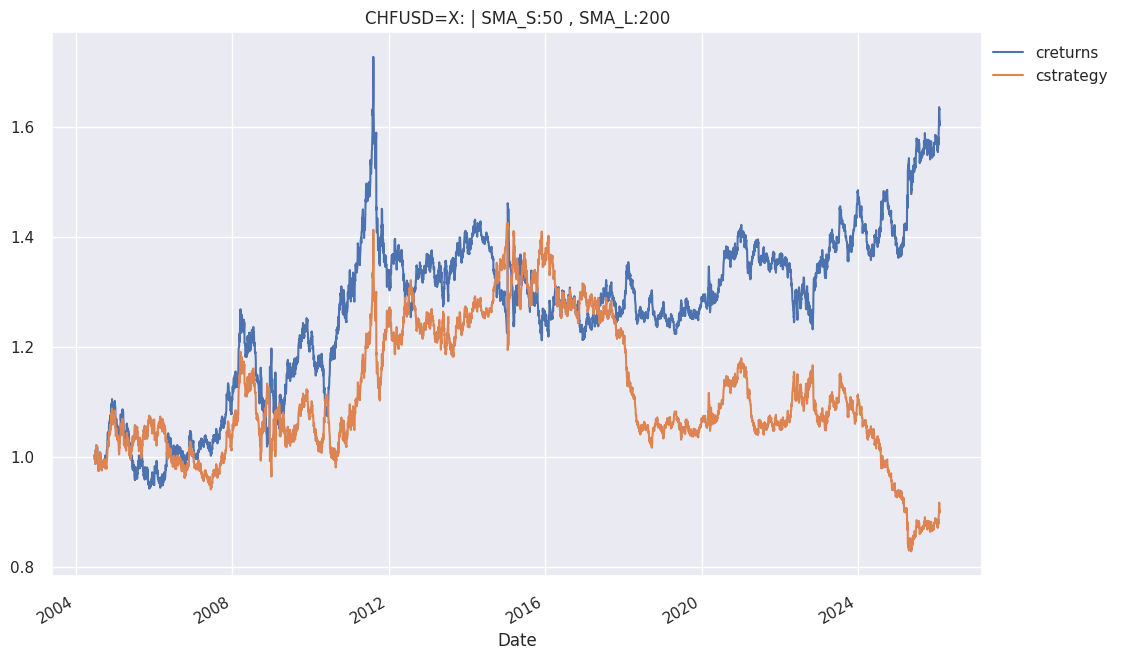

In [52]:
myclass.plot_results()

## Optimization Part1:

In [91]:
class SMABackTester():
  def __init__(self , symbol , SMA_S , SMA_L , start , end):
    self.symbol = symbol
    self.SMA_S = SMA_S
    self.SMA_L = SMA_L
    self.start = start
    self.end = end
    self.results = None
    self.get_data()

  def get_data(self):
    raw = yf.download(self.symbol , period = "max" , multi_level_index=False)
    raw.to_csv("forex.csv")
    raw = pd.read_csv("forex.csv" , index_col=[0] , parse_dates=[0] , header=[0])
    raw = raw.loc[self.start: self.end]
    raw.rename({"Close":"price"} , axis = 1 , inplace = True)
    raw = raw.price.to_frame().copy()
    raw["log_returns"] = np.log(raw.price / raw.price.shift(1))
    raw["SMA_S"] = raw.price.rolling(self.SMA_S).mean()
    raw["SMA_L"] = raw.price.rolling(self.SMA_L).mean()
    self.data = raw
    return raw

  def set_parameters(self , new_SMA_S = None , new_SMA_L = None):
    if new_SMA_S is not None:
      self.SMA_S = new_SMA_S
      self.data["SMA_S"] = self.data.price.rolling(self.SMA_S).mean()
    if new_SMA_L is not None:
      self.SMA_L = new_SMA_L
      self.data["SMA_L"] = self.data.price.rolling(self.SMA_L).mean()
    return self.data

  def test_strategy(self):
    data = self.data.copy().dropna()
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"] , 1 , -1)
    data["strategy"] = data["position"].shift(1) * data["log_returns"]
    data.dropna(inplace=True)
    data["creturns"] = data["log_returns"].cumsum().apply(np.exp) # cummulative returns
    data["cstrategy"] = data["strategy"].cumsum().apply(np.exp) # cummulative strategy
    self.results = data
    #return self.results

    outperformance = data["cstrategy"].iloc[-1] - data["creturns"].iloc[-1]
    df_performance = pd.DataFrame({"Cummulative_Returns_Performance": data["creturns"].iloc[-1] ,
                                   "Cummulative_Returns_Strategy_Performance": data["cstrategy"].iloc[-1] ,
                                   "Outer_Performance":outperformance} ,
                                   index = [f"Results for {tickers}"])

    return df_performance.T.style.format("{:.2%}")

  def plot_results(self):
    if self.results is None:
      print("No results to plot yet. Run a strategy.")
    else:
      title = f"{tickers}: | SMA_S:{self.SMA_S} , SMA_L:{self.SMA_L}"
      self.results[["creturns" ,"cstrategy"]].plot(title = title , figsize = (12,8))
      plt.legend(bbox_to_anchor = (1.15,1))
      plt.show()

  def update_and_run(self , SMA):
    self.set_parameters(SMA[0] , SMA[1])
    self.test_strategy() # Call test_strategy to populate self.results
    return -self.results["cstrategy"].iloc[-1]


In [92]:
myclass.results["creturns"].iloc[-1]

np.float64(1.6287771930796757)

In [93]:
myclass.test_strategy()

,Results for CHFUSD=X
Cummulative_Returns_Performance,162.88%
Cummulative_Returns_Strategy_Performance,88.85%
Outer_Performance,-74.03%


In [94]:
myclass.update_and_run([50,250])

np.float64(0.8884685176144113)

## Optimization (Part 2)

In [100]:
class SMABackTester():
  def __init__(self , symbol , SMA_S , SMA_L , start , end):
    self.symbol = symbol
    self.SMA_S = SMA_S
    self.SMA_L = SMA_L
    self.start = start
    self.end = end
    self.results = None
    self.get_data()

  def get_data(self):
    raw = yf.download(self.symbol , period = "max" , multi_level_index=False)
    raw.to_csv("forex.csv")
    raw = pd.read_csv("forex.csv" , index_col=[0] , parse_dates=[0] , header=[0])
    raw = raw.loc[self.start: self.end]
    raw.rename({"Close":"price"} , axis = 1 , inplace = True)
    raw = raw.price.to_frame().copy()
    raw["log_returns"] = np.log(raw.price / raw.price.shift(1))
    raw["SMA_S"] = raw.price.rolling(self.SMA_S).mean()
    raw["SMA_L"] = raw.price.rolling(self.SMA_L).mean()
    self.data = raw
    return raw

  def set_parameters(self , new_SMA_S = None , new_SMA_L = None):
    if new_SMA_S is not None:
      self.SMA_S = new_SMA_S
      self.data["SMA_S"] = self.data.price.rolling(self.SMA_S).mean()
    if new_SMA_L is not None:
      self.SMA_L = new_SMA_L
      self.data["SMA_L"] = self.data.price.rolling(self.SMA_L).mean()
    return self.data

  def test_strategy(self):
    data = self.data.copy().dropna()
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"] , 1 , -1)
    data["strategy"] = data["position"].shift(1) * data["log_returns"]
    data.dropna(inplace=True)
    data["creturns"] = data["log_returns"].cumsum().apply(np.exp) # cummulative returns
    data["cstrategy"] = data["strategy"].cumsum().apply(np.exp) # cummulative strategy
    self.results = data
    #return self.results

    outperformance = data["cstrategy"].iloc[-1] - data["creturns"].iloc[-1]
    df_performance = pd.DataFrame({"Cummulative_Returns_Performance": data["creturns"].iloc[-1] ,
                                   "Cummulative_Returns_Strategy_Performance": data["cstrategy"].iloc[-1] ,
                                   "Outer_Performance":outperformance} ,
                                   index = [f"Results for {tickers}"])

    return df_performance.T.style.format("{:.2%}")

  def plot_results(self):
    if self.results is None:
      print("No results to plot yet. Run a strategy.")
    else:
      title = f"{tickers}: | SMA_S:{self.SMA_S} , SMA_L:{self.SMA_L}"
      self.results[["creturns" ,"cstrategy"]].plot(title = title , figsize = (12,8))
      plt.legend(bbox_to_anchor = (1.15,1))
      plt.show()

  def update_and_run(self , SMA):
    self.set_parameters(int(SMA[0]) , int(SMA[1])) # Cast to int
    self.test_strategy() # Call test_strategy to populate self.results
    return -self.results["cstrategy"].iloc[-1]

  def optimize_parameters(self , SMA_S_range , SMA_L_range):
    opt = brute(self.update_and_run , (SMA_S_range , SMA_L_range) , finish = None )
    return opt , -self.update_and_run(opt)

In [101]:
myclass = SMABackTester("CHFUSD=X" , SMA_S = 50 , SMA_L = 200 , start = "2000-01-01" , end = str(dt.datetime.now().date()))

/tmp/ipython-input-4092004247.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(self.symbol , period = "max" , multi_level_index=False)
[*********************100%***********************]  1 of 1 completed


In [102]:
myclass.test_strategy()

,Results for CHFUSD=X
Cummulative_Returns_Performance,160.50%
Cummulative_Returns_Strategy_Performance,89.96%
Outer_Performance,-70.54%


In [104]:
myclass.optimize_parameters((10,50,1) , (100,300,1))

(array([ 37., 264.]), np.float64(1.1199912732723634))

## String Representation & Docstrings

In [108]:
class SMABackTester():
  ''' Class for the vectorized backtesting of SMA-based trading strategies.
  Attributes
  ==========
  symbol: str
      ticker symbol with which to work with
  SMA_S: int
      time window in days for shorter SMA
  SMA_L: int
      time window in days for longer SMA
  start: str
      start date for data retrieval
  end: str
      end date for data retrieval



  Methods
  =======
  get_data:
      retrieves and prepares the data

  set_parameters:
      sets one or two new SMA parameters

  test_strategy:
      runs the backtest for the SMA-based strategy

  plot_results:
      plots the performance of the strategy compared to buy and hold

  update_and_run:
      updates SMA parameters and returns the negative absolute performance (for minimization algorithm)

  optimize_parameters:
      implements a brute force optimization for the two SMA parameters
  '''
  def __init__(self , symbol , SMA_S , SMA_L , start , end):
    self.symbol = symbol
    self.SMA_S = SMA_S
    self.SMA_L = SMA_L
    self.start = start
    self.end = end
    self.tc = tc
    self.results = None
    self.get_data()

  def get_data(self):
    ''' Retrieves and prepares the data.
    '''
    raw = yf.download(self.symbol , period = "max" , multi_level_index=False)
    raw.to_csv("forex.csv")
    raw = pd.read_csv("forex.csv" , index_col=[0] , parse_dates=[0] , header=[0])
    raw = raw.loc[self.start: self.end]
    raw.rename({"Close":"price"} , axis = 1 , inplace = True)
    raw = raw.price.to_frame().copy()
    raw["log_returns"] = np.log(raw.price / raw.price.shift(1))
    raw["SMA_S"] = raw.price.rolling(self.SMA_S).mean()
    raw["SMA_L"] = raw.price.rolling(self.SMA_L).mean()
    self.data = raw
    return raw

  def set_parameters(self , new_SMA_S = None , new_SMA_L = None):
    ''' Updates SMA parameters and resp. time series.
    '''
    if new_SMA_S is not None:
      self.SMA_S = new_SMA_S
      self.data["SMA_S"] = self.data.price.rolling(self.SMA_S).mean()
    if new_SMA_L is not None:
      self.SMA_L = new_SMA_L
      self.data["SMA_L"] = self.data.price.rolling(self.SMA_L).mean()
    return self.data

  def test_strategy(self):
    ''' Backtests the trading strategy.
    '''
    data = self.data.copy().dropna()
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"] , 1 , -1)
    data["strategy"] = data["position"].shift(1) * data["log_returns"]
    data.dropna(inplace=True)
    data["creturns"] = data["log_returns"].cumsum().apply(np.exp) # cummulative returns
    data["cstrategy"] = data["strategy"].cumsum().apply(np.exp) # cummulative strategy
    self.results = data
    #return self.results

    outperformance = data["cstrategy"].iloc[-1] - data["creturns"].iloc[-1]
    df_performance = pd.DataFrame({"Cummulative_Returns_Performance": data["creturns"].iloc[-1] ,
                                   "Cummulative_Returns_Strategy_Performance": data["cstrategy"].iloc[-1] ,
                                   "Outer_Performance":outperformance} ,
                                   index = [f"Results for {tickers}"])

    return df_performance.T.style.format("{:.2%}")

  def plot_results(self):
    ''' Plots the cumulative performance of the trading strategy compared to buy and hold.
    '''
    if self.results is None:
      print("No results to plot yet. Run a strategy.")
    else:
      title = f"{tickers}: | SMA_S:{self.SMA_S} , SMA_L:{self.SMA_L}"
      self.results[["creturns" ,"cstrategy"]].plot(title = title , figsize = (12,8))
      plt.legend(bbox_to_anchor = (1.15,1))
      plt.show()

  def update_and_run(self , SMA):
    ''' Updates SMA parameters and returns the negative absolute performance (for minimization algorithm).
    Parameters
    ==========
    SMA: tuple
    SMA parameter tuple
    '''
    self.set_parameters(int(SMA[0]) , int(SMA[1])) # Cast to int
    self.test_strategy() # Call test_strategy to populate self.results
    return -self.results["cstrategy"].iloc[-1]

  def optimize_parameters(self , SMA_S_range , SMA_L_range):
    ''' Finds global maximum given the SMA parameter ranges.

    Parameters
    ==========
    SMA_S_range, SMA_L_range: tuple
    tuples of the form (start, end, step size)
    '''
    opt = brute(self.update_and_run , (SMA_S_range , SMA_L_range) , finish = None )
    return opt , -self.update_and_run(opt)

## Adding Transaction Costs to SMABacktester

In [109]:
class SMABackTester():
  ''' Class for the vectorized backtesting of SMA-based trading strategies.
  Attributes
  ==========
  symbol: str
      ticker symbol with which to work with
  SMA_S: int
      time window in days for shorter SMA
  SMA_L: int
      time window in days for longer SMA
  start: str
      start date for data retrieval
  end: str
      end date for data retrieval
  tc: float
      proportional transaction costs per trade


  Methods
  =======
  get_data:
      retrieves and prepares the data

  set_parameters:
      sets one or two new SMA parameters

  test_strategy:
      runs the backtest for the SMA-based strategy

  plot_results:
      plots the performance of the strategy compared to buy and hold

  update_and_run:
      updates SMA parameters and returns the negative absolute performance (for minimization algorithm)

  optimize_parameters:
      implements a brute force optimization for the two SMA parameters
  '''
  def __init__(self , symbol , SMA_S , SMA_L , start , end , tc):
    self.symbol = symbol
    self.SMA_S = SMA_S
    self.SMA_L = SMA_L
    self.start = start
    self.end = end
    self.tc = tc
    self.results = None
    self.get_data()

  def get_data(self):
    ''' Retrieves and prepares the data.
    '''
    raw = yf.download(self.symbol , period = "max" , multi_level_index=False)
    raw.to_csv("forex.csv")
    raw = pd.read_csv("forex.csv" , index_col=[0] , parse_dates=[0] , header=[0])
    raw = raw.loc[self.start: self.end]
    raw.rename({"Close":"price"} , axis = 1 , inplace = True)
    raw = raw.price.to_frame().copy()
    raw["log_returns"] = np.log(raw.price / raw.price.shift(1))
    raw["SMA_S"] = raw.price.rolling(self.SMA_S).mean()
    raw["SMA_L"] = raw.price.rolling(self.SMA_L).mean()
    self.data = raw
    return raw

  def set_parameters(self , new_SMA_S = None , new_SMA_L = None):
    ''' Updates SMA parameters and resp. time series.
    '''
    if new_SMA_S is not None:
      self.SMA_S = new_SMA_S
      self.data["SMA_S"] = self.data.price.rolling(self.SMA_S).mean()
    if new_SMA_L is not None:
      self.SMA_L = new_SMA_L
      self.data["SMA_L"] = self.data.price.rolling(self.SMA_L).mean()
    return self.data

  def test_strategy(self):
    ''' Backtests the trading strategy.
    '''
    data = self.data.copy().dropna()
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"] , 1 , -1)
    data["trades"] = data.position.diff().fillna(0).abs()
    data["strategy"] = data["position"].shift(1) * data["log_returns"]
    data.strategy = data.strategy - data.trades * self.tc
    data.dropna(inplace=True)
    data["creturns"] = data["log_returns"].cumsum().apply(np.exp) # cummulative returns
    data["cstrategy"] = data["strategy"].cumsum().apply(np.exp) # cummulative strategy
    self.results = data
    #return self.results

    outperformance = data["cstrategy"].iloc[-1] - data["creturns"].iloc[-1]
    df_performance = pd.DataFrame({"Cummulative_Returns_Performance": data["creturns"].iloc[-1] ,
                                   "Cummulative_Returns_Strategy_Performance": data["cstrategy"].iloc[-1] ,
                                   "Outer_Performance":outperformance} ,
                                   index = [f"Results for {tickers}"])

    return df_performance.T.style.format("{:.2%}")

  def plot_results(self):
    ''' Plots the cumulative performance of the trading strategy compared to buy and hold.
    '''
    if self.results is None:
      print("No results to plot yet. Run a strategy.")
    else:
      title = f"{tickers}: | SMA_S:{self.SMA_S} , SMA_L:{self.SMA_L}"
      self.results[["creturns" ,"cstrategy"]].plot(title = title , figsize = (12,8))
      plt.legend(bbox_to_anchor = (1.15,1))
      plt.show()

  def update_and_run(self , SMA):
    ''' Updates SMA parameters and returns the negative absolute performance (for minimization algorithm).
    Parameters
    ==========
    SMA: tuple
    SMA parameter tuple
    '''
    self.set_parameters(int(SMA[0]) , int(SMA[1])) # Cast to int
    self.test_strategy() # Call test_strategy to populate self.results
    return -self.results["cstrategy"].iloc[-1]

  def optimize_parameters(self , SMA_S_range , SMA_L_range):
    ''' Finds global maximum given the SMA parameter ranges.

    Parameters
    ==========
    SMA_S_range, SMA_L_range: tuple
    tuples of the form (start, end, step size)
    '''
    opt = brute(self.update_and_run , (SMA_S_range , SMA_L_range) , finish = None )
    return opt , -self.update_and_run(opt)

In [112]:
ptc = 0.00007

In [113]:
myclass = SMABackTester("EURUSD=X", 50, 200, "2004-01-01", dt.datetime.now().date(), tc = ptc)

/tmp/ipython-input-4100419981.py:52: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(self.symbol , period = "max" , multi_level_index=False)
[*********************100%***********************]  1 of 1 completed


In [114]:
myclass.test_strategy()

,Results for CHFUSD=X
Cummulative_Returns_Performance,96.23%
Cummulative_Returns_Strategy_Performance,119.08%
Outer_Performance,22.85%


In [115]:
myclass.optimize_parameters((25, 50, 1), (100, 200, 1))

(array([ 29., 160.]), np.float64(2.7035978740999242))

In [117]:
myclass.update_and_run((29,160))

np.float64(-2.7035978740999242)

## Special Case: Price/SMA Crossover

__Price == SMA1__

In [ ]:
tester = SMABacktester("EURUSD=X", 1, 200, "2004-01-01", "2020-06-30", ptc)

In [ ]:
tester.test_strategy()

In [ ]:
tester.plot_results()

In [ ]:
tester.data

In [ ]:
tester.optimize_parameters((1, 5, 1), (50, 200, 1))